In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('Medicaldataset.csv')

In [10]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [16]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [18]:
df.Result.value_counts()

Result
positive    810
negative    509
Name: count, dtype: int64

In [20]:
df.Result.value_counts()/len(df)*100

Result
positive    61.410159
negative    38.589841
Name: count, dtype: float64

In [22]:
x=df.drop('Result', axis=1)

In [24]:
x

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006
1315,66,1,84,125,55,149.0,1.33,0.172
1316,45,1,85,168,104,96.0,1.24,4.250
1317,54,1,58,117,68,443.0,5.80,0.359


In [26]:
y=df.Result.values

In [28]:
y

array(['negative', 'positive', 'negative', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25)

In [32]:
x_train

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
913,55,1,81,150,51,138.0,17.22,2.800
511,50,1,73,128,63,124.0,40.60,0.992
1190,70,0,45,130,58,175.0,2.84,0.053
61,90,0,58,120,69,191.0,5.22,0.015
286,50,0,77,100,68,166.0,1.63,0.003
...,...,...,...,...,...,...,...,...
20,60,1,92,151,78,301.0,1.60,0.005
528,47,0,89,123,73,324.0,1.97,0.007
888,71,1,59,107,64,97.0,1.97,1.450
396,50,1,88,134,86,100.0,5.39,2.630


In [34]:
x_test

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
845,41,0,103,115,85,171.0,1.640,0.015
1052,65,1,76,133,75,125.0,4.570,0.549
1001,42,1,60,166,90,90.0,3.400,0.014
34,50,1,61,136,70,136.0,1.370,1.150
805,59,1,61,119,75,123.0,1.720,0.006
...,...,...,...,...,...,...,...,...
1306,60,0,78,109,69,230.0,19.470,0.003
273,38,0,59,100,56,92.0,15.670,0.006
1088,68,1,65,112,58,134.0,7.470,0.022
569,63,0,62,124,66,271.0,0.657,0.021


In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [38]:
x_train_sc

array([[-0.06986649,  0.72866985,  0.06085598, ..., -0.11958331,
         0.03572134,  2.23904125],
       [-0.43858561,  0.72866985, -0.10291699, ..., -0.30370494,
         0.54290074,  0.59758825],
       [ 1.03629086, -1.37236363, -0.67612239, ...,  0.36702384,
        -0.27622219, -0.25491417],
       ...,
       [ 1.11003469,  0.72866985, -0.38951969, ..., -0.65879665,
        -0.29509499,  1.0133988 ],
       [-0.43858561,  0.72866985,  0.20415733, ..., -0.61934202,
        -0.22090536,  2.08470109],
       [ 0.00387733,  0.72866985, -0.08244537, ..., -0.64564511,
        -0.3005182 , -0.263993  ]])

In [40]:
from sklearn.tree import DecisionTreeClassifier
#Initiate the classifier
model_dt=DecisionTreeClassifier(criterion='gini')

#passing the data to classifier
model_dt.fit(x_train_sc, y_train)

DecisionTreeClassifier()

In [42]:
y_pred=model_dt.predict(x_test_sc)

In [44]:
y_pred

array(['positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'negative', 'positive', 'negative', 'positi

In [48]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.97      0.98       122
    positive       0.98      1.00      0.99       208

    accuracy                           0.99       330
   macro avg       0.99      0.98      0.99       330
weighted avg       0.99      0.99      0.99       330



In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[118   4]
 [  0 208]]


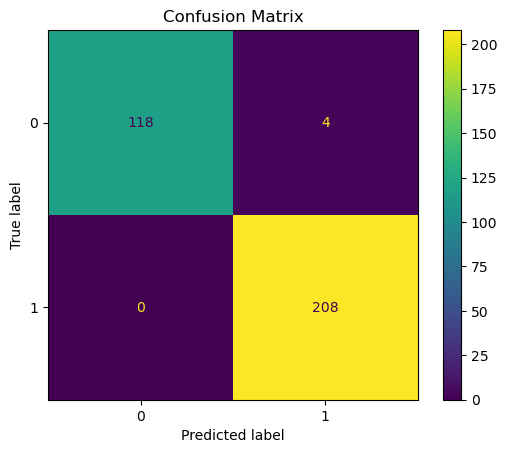

In [65]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [67]:
from sklearn.metrics import accuracy_score
print("\nAccuracy:", round(accuracy_score(y_test,y_pred)*100, 2))


Accuracy: 98.79
